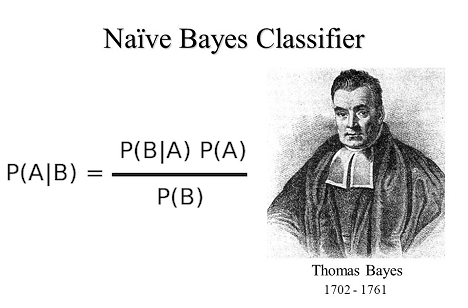

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Problem statement

### Prepare a classification model using Naive Bayes for salary data 

#### Data Description:

    age -- age of a person
    workclass	-- A work class is a grouping of work 
    education	-- Education of an individuals	
    maritalstatus -- Marital status of an individulas	
    occupation	 -- occupation of an individuals
    relationship -- 	
    race --  Race of an Individual
    sex --  Gender of an Individual
    capitalgain --  profit received from the sale of an investment	
    capitalloss	-- A decrease in the value of a capital asset
    hoursperweek -- number of hours work per week	
    native -- Native of an individual
    Salary -- salary of an individual

In [2]:
rawData = pd.read_csv('SalaryData_Train.csv',skipinitialspace=True)
rawData.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# First hand Intution of the Data
===============================================

    The first hand interpretatino of the problem statement is that there are 12 Attributes of a person / individual and we   are to classify them as an individual earning more than 50K or less than or Equal to 50K as Salary. 
   
**Irregularities in DATA DESCRIPTION & ACTUAL DATA**

    While the discription says 12 columns but the actual data has 13 columns. Further the data description does not explain the meaning of relationship attribute in the dataset. Lastly, the 'educationno' is not explained in the data desciption but it is there in Dataset. 
    
*My intution is that
------------------------
        'educationno' is no of years of education and 
        'relationship' is the role of the individual with respect to his family.
        
**So that makes Salary Column/Feature as our y variable. In other words 'Salary' Feature is our dependent variable/predicted variable/fitted variable and rest of features are independent variables/predictors.**

# EDA
=======

### What is the shape of the dataset ???
    There are 30161 rows and 14 columns in the dataset (13 are predictors and 1 is predicted)
### What are the Datatypes of each columns in the dataset ???
    There are two datatypes in the dataset, namely, int64 and object. int64 clearly tells that there is numeric data and no characters / symbols in the data. There is little chance that there will unwanted values in those datatypes. 
    
    However, the object datatypes may incluede string data with special characters in it. We need to pay more attention on this datatype in the dataset.
### Are there any 'object' Datatypes in the dataset ???
    Yes, there are 9 columns mraked as object datatype. It is not a problem as long as it is a string data which makes sense but if the data contains special characters, which does not makes sense we should process it. Special attention to be given on the object datatypes.
### Are there any Missing Values in the dataset ???
    Luckily, there are no missing values in the data set. 

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
object_columns = []
numeric_columns = []
for i in rawData.columns:
    if rawData[i].dtypes == object:
        object_columns.append(i)
    else:
        numeric_columns.append(i)
print(f'no of object columns in the dataset are {len(object_columns)}\n',object_columns,end='\n\n')
print(f'no of object columns in the dataset are {len(numeric_columns)}\n',numeric_columns,end='\n\n')

no of object columns in the dataset are 9
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

no of object columns in the dataset are 5
 ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']



                                                   ***

### `Whether the columns contain the values that, they should represent or is something messy ???`

<blockquote>luckily for us there are no unwanted data in the categorical values. All the string values in the dataset make sense. However, some of the features have high cardinality, which need to be analised, they are not invalid though.  
    
`As fas as the numerical data goes right now what we can say is that they all contain valid data and if there are outliers in the data set if subject to further analysis.`</blockquote>

## Data DICTIONARY:
==========================

    age (numerical)             -- age of a person
    
    workclass (Categorical)	    -- A work class is a grouping of work              --  7 Classes
                                     Class                  Count
                                     -----                  -----                                              
                                     Private               22285
                                     Self-emp-not-inc       2499
                                     Local-gov              2067
                                     State-gov              1279
                                     Self-emp-inc           1074
                                     Federal-gov             943
                                     Without-pay              14
                         
    education (Categorical)	    -- Education of an individuals                      -- 16 Classes
    
    educationno (numerical)     -- No of years in education
                        
    maritalstatus (Categorical) -- Marital status of an individulas                 --  7 Classes
                                     Class                          Count
                                     -----                          -----    
                                     Married-civ-spouse             14065   (married a civilian spouse)
                                     Never-married                   9725
                                     Divorced                        4214
                                     Separated                        939
                                     Widowed                          827
                                     Married-spouse-absent            370
                                     Married-AF-spouse                 21   (married a Armed forces Spouse)
    
    occupation  (Categorical)  -- occupation of an individuals                       -- 14 Classes
                        
    relationship (Categorical) -- Relationship or Role in the family    	         --  6 Classes
                                     Class                  Count
                                     -----                  -----
                                     Husband                12463
                                     Not-in-family           7726
                                     Own-child               4466
                                     Unmarried               3212
                                     Wife                    1406
                                     Other-relative           888
    
    race (Categorical)          --  Race of an Individual                            --  5 Classes
                                     Class               Count
                                     -----               ------
                                     White               25932
                                     Black                2817
                                     Asian-Pac-Islander    895
                                     Amer-Indian-Eskimo    286
                                     Other                 231
                         
    sex (Categorical)           --  Gender of an Individual                          --  2 Classes
                                    Class       Count
                                    -----       -----
                                     Male       20380
                                     Female      9781
    
    capitalgain   --  profit received from the sale of an investment	
    capitalloss	  -- A decrease in the value of a capital asset
    hoursperweek  -- number of hours work per week	
    native                     -- Native of an individual                            -- 40 Classes
                                    
    Salary (Categorical)       -- salary of an individual                            --  2 Classes
                                     Class   Count
                                     -----   -----
                                     <=50K   22653
                                     >50K     7508

In [5]:
for x in object_columns:
    i = rawData.columns.get_loc(x)
    print(f'\033[7m({i}) \033[0m\033[1mThe unique values in {x} are {rawData[x].nunique()}\033[0m',end='\n\n')
    if rawData[x].nunique() < 10:
        print(pd.DataFrame(rawData[x].value_counts()),end='\n\n')
    else:
        print(f'\033[4mThe first Five unique values and their count out of {rawData[x].nunique()} unique values\033[0m',end='\n\n')
        print(pd.DataFrame(rawData[x].value_counts())[:5],end='\n\n')

(1) The unique values in workclass are 7

                  workclass
Private               22285
Self-emp-not-inc       2499
Local-gov              2067
State-gov              1279
Self-emp-inc           1074
Federal-gov             943
Without-pay              14

(2) The unique values in education are 16

The first Five unique values and their count out of 16 unique values

              education
HS-grad            9840
Some-college       6677
Bachelors          5044
Masters            1627
Assoc-voc          1307

(4) The unique values in maritalstatus are 7

                       maritalstatus
Married-civ-spouse             14065
Never-married                   9725
Divorced                        4214
Separated                        939
Widowed                          827
Married-spouse-absent            370
Married-AF-spouse                 21

(5) The unique values in occupation are 14

The first Five unique values and their count out of 14 unique values

                 o

# **Univatiate analysis**

## Understanding the y Variable

    There are two categories i.e. 
        1)  less than or equal to 50 Thousand Salary (<=50K)
        2)  Greater than 50 Thousant Salary (>50K)
        
<blockquote>The Dataset is dominated by one class. The dominating Class is the one with less than or equal to 50 thousand. The raito of class data is 3:1. So the dominating class is 3 times bigger than non dominating class. (I think I will do resampling from the data)</blockquote>

In [6]:
rawData.Salary.value_counts()

<=50K    22653
>50K      7508
Name: Salary, dtype: int64

In [7]:
print('\033[1mThe ratio of class <=50K : class >50K is', np.round((22653/(22653+7508)),2),':',np.round((7508/(22653+7508)),2))

The ratio of class <=50K : class >50K is 0.75 : 0.25


# Understanding   "X"   ---VS---    "y"  (Independent  VS  Dependent)

Categorical features
-----

## Work Class VS Salary

    workclass (Categorical)        -- A work class is a grouping of work              --  7 Classes
                                 Class                  Count
                                 -----                  -----                                              
                                 Private               22285
                                 Self-emp-not-inc       2499
                                 Local-gov              2067
                                 State-gov              1279
                                 Self-emp-inc           1074
                                 Federal-gov             943
                                 Without-pay              14

As we can see `'Private'` class dominates that workclass feature with about 73% of times in the dataset. However, distribution of sal class accross workclass show no uniformity. While, mejority of people in `'self-emp-inc'` class earn greater than 50K salary, and people from `'governmant'` classes tend to do better in earning more than 50K, while people from `'Private'` class tend to show that more than 75% of people earn less than 50K Salary 

So, possibly we can `think of clubing all the Govt sector workclasses in to a single class to make it more representative.`

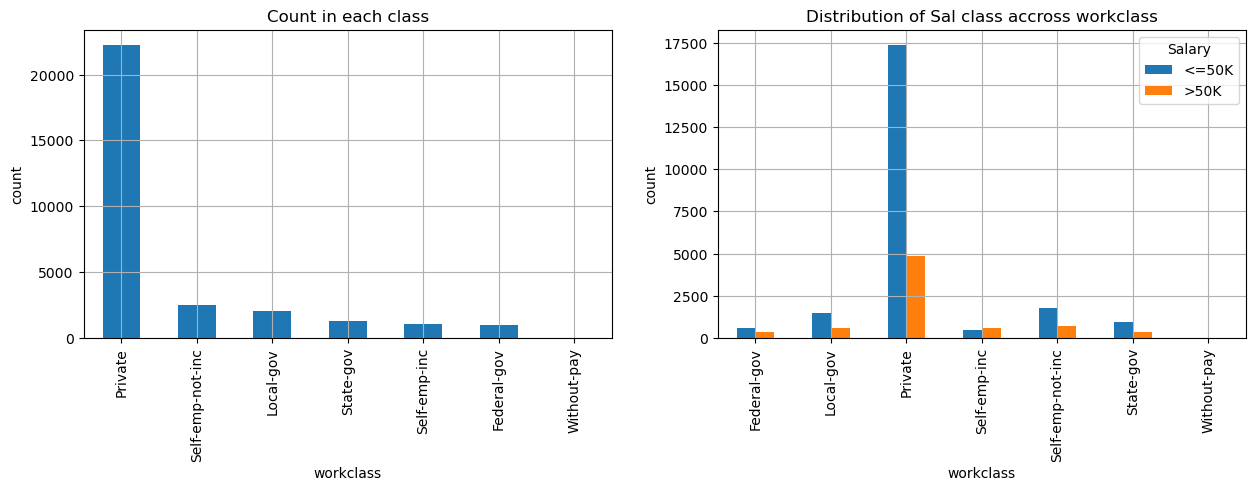

In [8]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
rawData.workclass.value_counts().plot(ax=ax[0],kind='bar',grid=True,title='Count in each class',
                                      xlabel='workclass',ylabel='count')
pd.crosstab(rawData.workclass, rawData.Salary).plot(ax=ax[1],kind='bar',
                                                    grid=True, ylabel='count',
                                                    title='Distribution of Sal class accross workclass')
# sns.countplot(x='workclass',hue='Salary',data=rawData, ax=ax[0])
# sns.catplot(x='workclass',hue='Salary',kind='count',data=rawData,ax=ax[1])
# plt.draw()
# ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,ha='right')
plt.show()

education vs salary
-----------

`education (Categorical)        -- Education of an individuals                      -- 16 Classes`

|class|count|||class|count| 
|-----|-----|||-----|-----|
|HS-grad|9840|||7th-8th|557|
|Some-college|    6677|||Prof-school|      542|
|Bachelors|       5044|||9th|              455|
|Masters|         1627|||12th|             377|
|Assoc-voc|       1307|||Doctorate|        375|
|11th|            1048|||5th-6th|          288|
|Assoc-acdm|      1008|||1st-4th|          151|
|10th|             820|||Preschool|         45|

Education feature is plagued with high cardinality and only few classes dominate the feature. `HS-grad, Some college,bachelors` together they account for about 72% of the values and rest of 13 classes represent only 28% of the data. Large classes tend to dominate the algorithm and influence the prediction. let us try to balance the data that are similar and can be grouped. We can work to club smaller classes to make a larger class to make it more representative. one such idea we can think of clubbing all the classes ranging from `1st to 12th`. However, we need to figure out how to treat prof-school, preschool, doctorate, etc.

Another thing we notice is that the higher the education the better the salaries. in our case only higher education classes have good representation in greater than 50K salary. `So we can say that education has a strong influence on the your salary, in our case your chance of earning greater than 50k salary increases with education.`

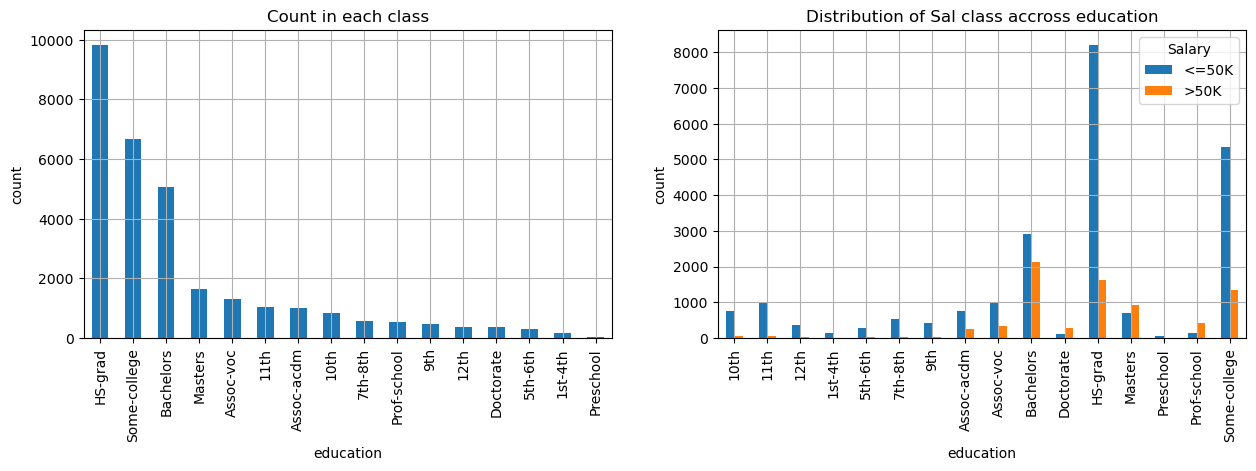

In [9]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
rawData.education.value_counts().plot(ax=ax[0],kind='bar',grid=True,title='Count in each class',
                                      xlabel='education',ylabel='count')
pd.crosstab(rawData.education, rawData.Salary).plot(ax=ax[1],kind='bar',
                                                    grid=True, ylabel='count',
                                                    title='Distribution of Sal class accross education')
plt.show()

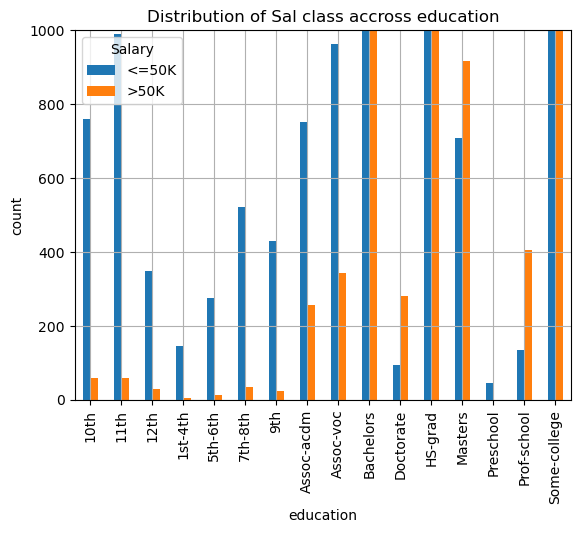

In [10]:
pd.crosstab(rawData.education, rawData.Salary).plot(kind='bar',
                                                    grid=True, ylabel='count',
                                                    title='Distribution of Sal class accross education',ylim=(0,1000))
plt.show()

maritalstatus Vs Salary
----
maritalstatus (Categorical) -- Marital status of an individulas                 --  `7 Classes`

|Class|Count|
|-----|-----|   
|Married-civ-spouse|14065|
|Never-married|9725|
|Divorced|4214|
|Separated|939|
|Widowed|827|
|Married-spouse-absent|370|
|Married-AF-spouse|21|

As we can note that three classes namely `Married-civ-spouse, Never-married, Divorced` account for about 92% of the data. we can actually club the data in such a way that they represent three classes, namely `married, never married, and (divorced or separated or spouse absent)`. 

The only inference we can draw is that married-civ-spouse class has the highest above 50K salary. but this could be the people in class never married are young and they starting their career and pople in all other categories are retired. Hence, we can not confidently say any thing about marrital status and salary class.

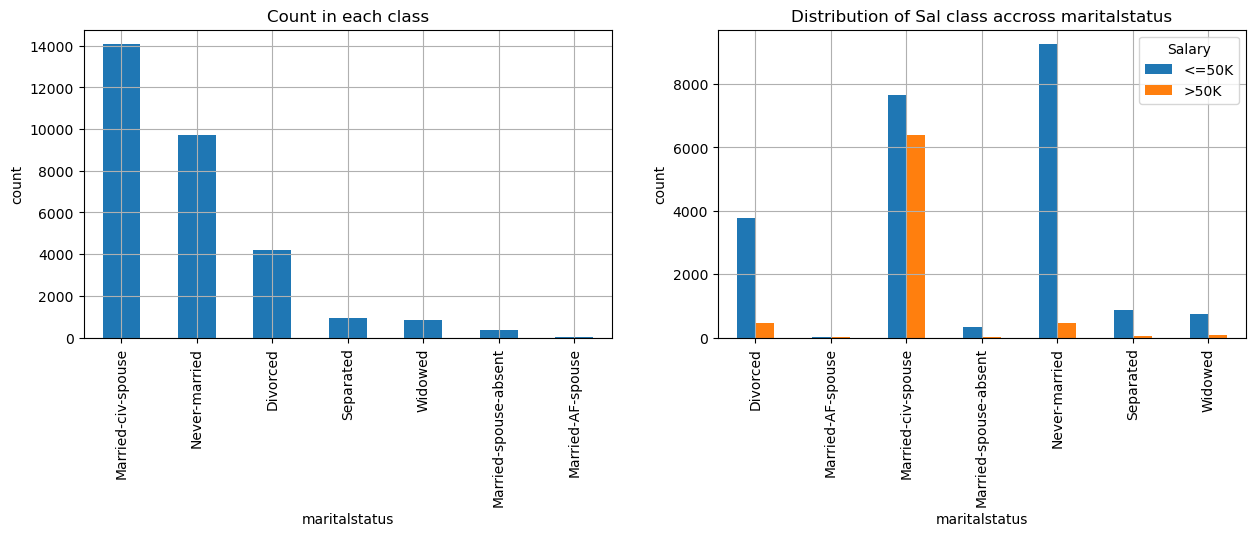

In [11]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
rawData.maritalstatus.value_counts().plot(ax=ax[0],kind='bar',grid=True,title='Count in each class',
                                      xlabel='maritalstatus',ylabel='count')
pd.crosstab(rawData.maritalstatus, rawData.Salary).plot(ax=ax[1],kind='bar',
                                                    grid=True, ylabel='count',
                                                    title='Distribution of Sal class accross maritalstatus')
plt.show()

In [12]:
pd.crosstab(rawData.maritalstatus, rawData.Salary)

Salary,<=50K,>50K
maritalstatus,,
Divorced,3762,452
Married-AF-spouse,11,10
Married-civ-spouse,7666,6399
Married-spouse-absent,339,31
Never-married,9255,470
Separated,873,66
Widowed,747,80


In [13]:
# rawData.groupby(['maritalstatus']).count()
pd.pivot_table(data=rawData, values='age',columns=['maritalstatus'],index=['sex','education'])

maritalstatus         Divorced  Married-AF-spouse  Married-civ-spouse  \
sex    education                                                        
Female 10th          44.898305                NaN           36.571429   
       11th          41.916667                NaN           41.571429   
       12th          40.562500                NaN           38.142857   
       1st-4th       60.750000                NaN           42.666667   
       5th-6th       51.777778                NaN           44.692308   
       7th-8th       50.700000                NaN           43.900000   
       9th           45.407407                NaN           44.050000   
       Assoc-acdm    40.348485          35.000000           35.464789   
       Assoc-voc     40.905405                NaN           36.562500   
       Bachelors     43.711191          27.000000           38.014493   
       Doctorate     49.100000                NaN           42.666667   
       HS-grad       43.035955          30.857143           40.634096   
       Masters       46.953333                NaN           42.710280   
       Preschool           NaN                NaN           39.000000   
       Prof-school   42.900000                NaN           39.730769   
       Some-college  42.592593          28.000000           39.637931   
Male   10th          42.404255                NaN           46.367893   
       11th          40.617021                NaN           41.866221   
       12th          40.550000                NaN           42.585859   
       1st-4th       63.000000                NaN           46.985075   
       5th-6th       52.777778                NaN           44.891473   
       7th-8th       47.500000                NaN           50.137584   
       9th           47.520000                NaN           44.658031   
       Assoc-acdm    41.630769                NaN           41.370270   
       Assoc-voc     39.552632          29.000000           41.210345   
       Bachelors     44.571429          34.500000           42.834697   
       Doctorate     50.500000                NaN           48.479167   
       HS-grad       40.980000          31.800000           42.491198   
       Masters       47.620253                NaN           44.997605   
       Preschool     36.000000                NaN           46.642857   
       Prof-school   44.303030                NaN           46.413889   
       Some-college  41.809798          26.000000           42.131436   

maritalstatus        Married-spouse-absent  Never-married  Separated  \
sex    education                                                       
Female 10th                      36.714286      22.894231  41.777778   
       11th                      31.800000      21.578199  38.576923   
       12th                      29.250000      22.794521  36.875000   
       1st-4th                   33.666667      32.666667  49.000000   
       5th-6th                   50.000000      34.960000  43.636364   
       7th-8th                   45.500000      36.620690  45.333333   
       9th                       42.000000      31.829268  44.357143   
       Assoc-acdm                46.166667      29.789474  41.062500   
       Assoc-voc                 34.400000      29.821429  42.481481   
       Bachelors                 41.862069      30.138955  40.857143   
       Doctorate                 43.000000      43.000000  39.750000   
       HS-grad                   39.683333      29.138962  38.979508   
       Masters                   45.888889      38.182266  41.916667   
       Preschool                       NaN      38.300000  48.000000   
       Prof-school                     NaN      36.114286  43.333333   
       Some-college              35.111111      25.764372  38.301587   
Male   10th                      46.625000      25.317949  39.666667   
       11th                      33.727273      22.963333  33.588235   
       12th                      49.333333      23.348837  36.000000   
     

occupation Vs Salary
-----

occupation  (Categorical)  -- occupation of an individuals                       -- 14 Classes

|Sl no|Class|Count||Sl no|Class|Count|
|-----|-----|-----||-----|-----|-----|
| 1)| Prof-specialty   |      4038|| 8)| Transport-moving |    1572|
| 2)| Craft-repair     |     4030|| 9)| Handlers-cleaners|    1350|
| 3)| Exec-managerial  |      3992||10)| Farming-fishing  |     989|
| 4)| Adm-clerical     |      3721||11)| Tech-support    |     912|
| 5)| Sales            |      3584||12)| Protective-serv |      644|
| 6)| Other-service   |     3212||13)| Priv-house-serv |      143|
| 7)| Machine-op-inspct|    1965||14)| Armed-Forces    |        9|
|||cont....|

As it can be noted that the classes of occupation are well distributed. there are some columns who have low representation. `Armed forces` accorss features has low representation, don't really know how to handle it. There are high chances of model going wrong in that calass. 

However, it is very evident that your `occupation has high influence on your chances of earning salary greater than 50K`.

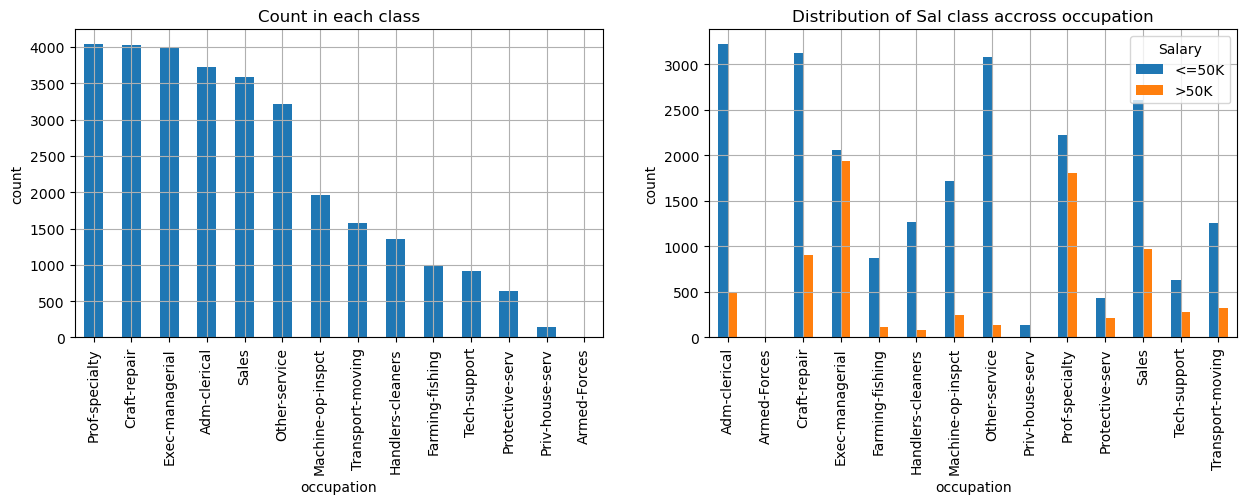

In [14]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
rawData.occupation.value_counts().plot(ax=ax[0],kind='bar',grid=True,title='Count in each class',
                                      xlabel='occupation',ylabel='count')
pd.crosstab(rawData.occupation, rawData.Salary).plot(ax=ax[1],kind='bar',
                                                    grid=True, ylabel='count',
                                                    title='Distribution of Sal class accross occupation')
plt.show()

relationship Vs Salary
-----

relationship (Categorical) -- Relationship or Role in the family                 --  6 Classes

|Class||Count|
|-----||-----|
|Husband|12463|
|Not-in-family|7726|
|Own-child|4466|
|Unmarried|3212|
|Wife|1406|
|Other-relative|888|

Relationship has a `vague` representation in the dataset. It tries to expalin the relationship of the invdividual with other members of the family, such as, `husband, not-in-family, own-child, wife or other-relative`. However `unmarried` is a status not a relationship. Any way we already have the `maritalstatus as an attribute`, so, we may not `need this feature`

`LET US DROP THIS FEATURE`

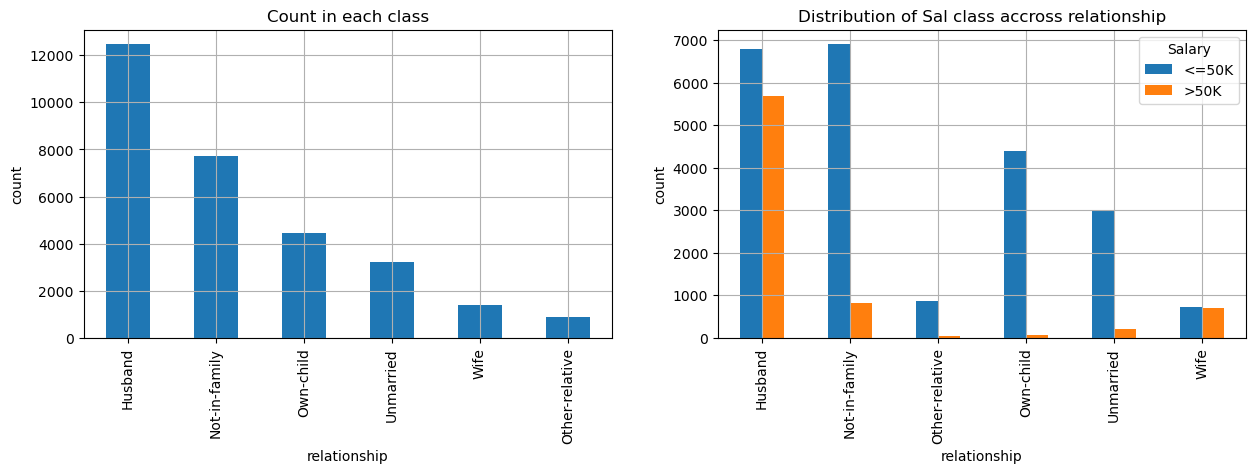

In [15]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
rawData.relationship.value_counts().plot(ax=ax[0],kind='bar',grid=True,title='Count in each class',
                                      xlabel='relationship',ylabel='count')
pd.crosstab(rawData.relationship, rawData.Salary).plot(ax=ax[1],kind='bar',
                                                    grid=True, ylabel='count',
                                                    title='Distribution of Sal class accross relationship')
plt.show()

Race Vs Salary
----------
race (Categorical)          --  Race of an Individual                            --  5 Classes

|Class|               |Count|
|-----|               |-----|
|White|               |25932|
|Black|               |2817|
|Asian-Pac-Islander|    |895|
|Amer-Indian-Eskimo|    |286|
|Other|                 |231|

Race is completely dominated by one class i.e. `'White'` which is almost 90% of the weight of the data. We can group the rest of the classes in to one single group to increase their representation.

Looking at the data it cleary shows that your chances of the being in salary greater than 50K increases if you belong to the class `'white'`

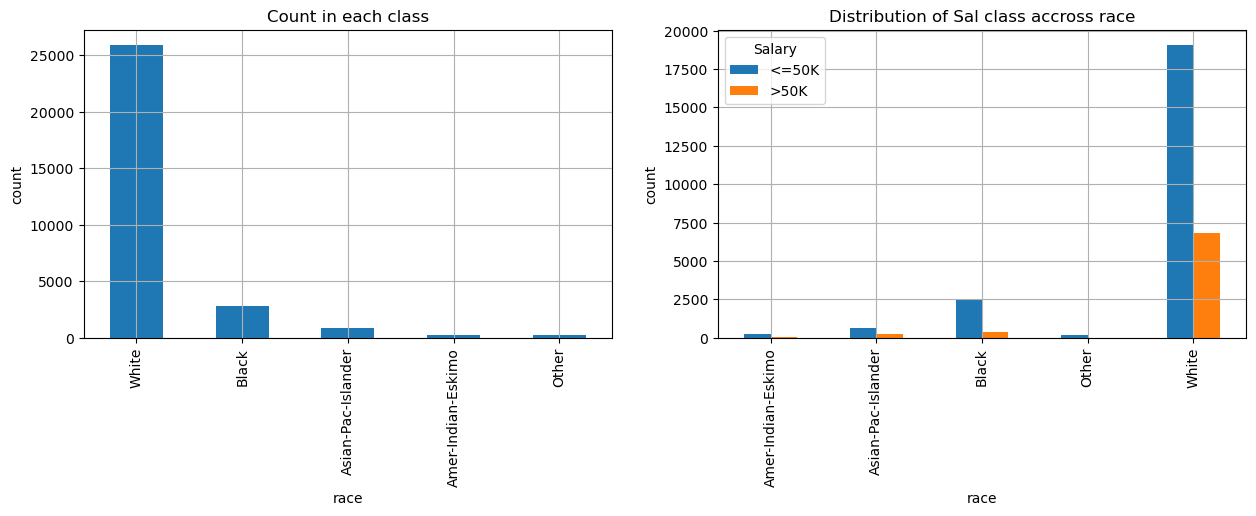

In [16]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
rawData.race.value_counts().plot(ax=ax[0],kind='bar',grid=True,title='Count in each class',
                                      xlabel='race',ylabel='count')
pd.crosstab(rawData.race, rawData.Salary).plot(ax=ax[1],kind='bar',
                                                    grid=True, ylabel='count',
                                                    title='Distribution of Sal class accross race')
plt.show()

Sex Vs Salary
-----
sex (Categorical)           --  Gender of an Individual                          --  2 Classes

|Class|       |Count|
|-----|       |-----|
|Male |      |20380|
|Female|      |9781|

Sex is also dominated by the `Male` class, and also one can notice gender bias in salaries based on ses. it shows that if your are white male you have very high probabilty that your are earning more than 50K

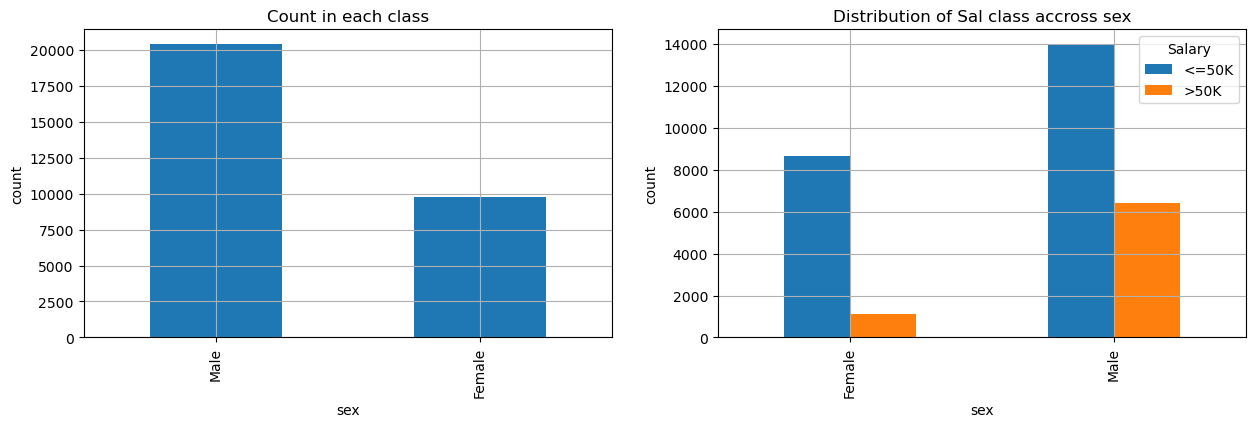

In [17]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
rawData.sex.value_counts().plot(ax=ax[0],kind='bar',grid=True,title='Count in each class',
                                      xlabel='sex',ylabel='count')
pd.crosstab(rawData.sex, rawData.Salary).plot(ax=ax[1],kind='bar',
                                                    grid=True, ylabel='count',
                                                    title='Distribution of Sal class accross sex')
plt.show()

Native
----

native                     -- Native of an individual                            -- 40 Classes

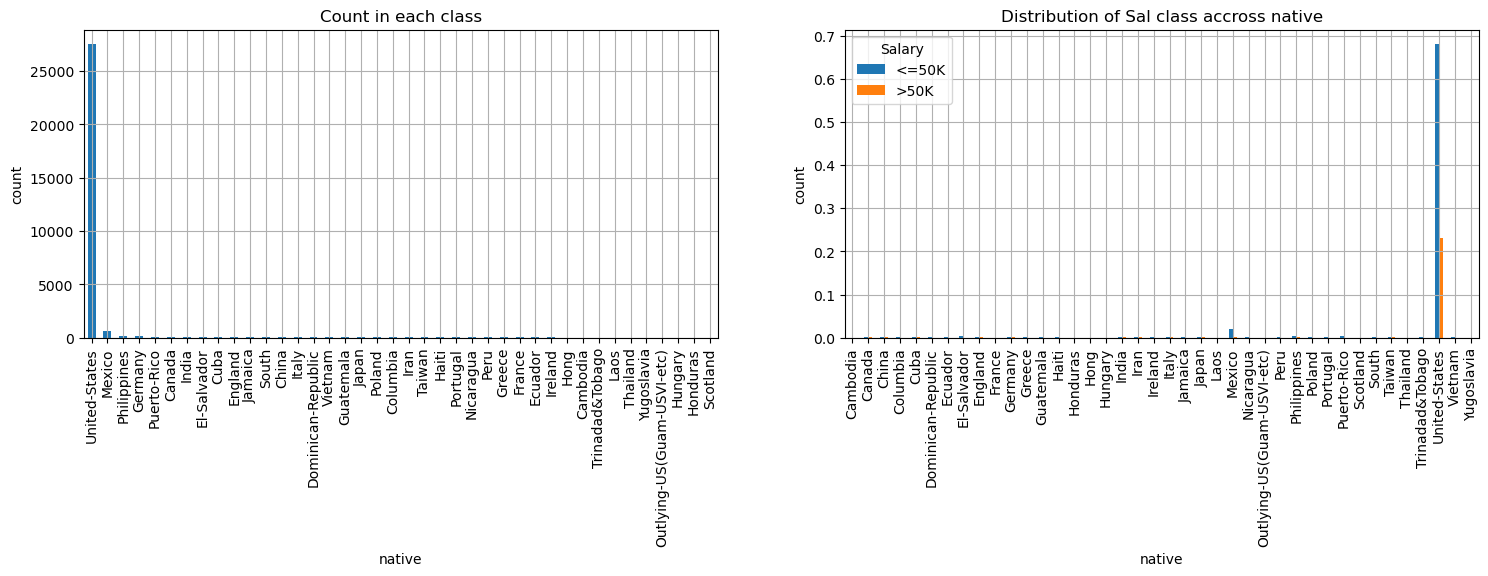

In [18]:
fig,ax = plt.subplots(1,2,figsize=(18,4))
rawData.native.value_counts().plot(ax=ax[0],kind='bar',grid=True,title='Count in each class',
                                      xlabel='native',ylabel='count')
pd.crosstab(rawData.native, rawData.Salary,normalize=True).plot(ax=ax[1],kind='bar',
                                                    grid=True, ylabel='count',
                                                    title='Distribution of Sal class accross native')
plt.show()

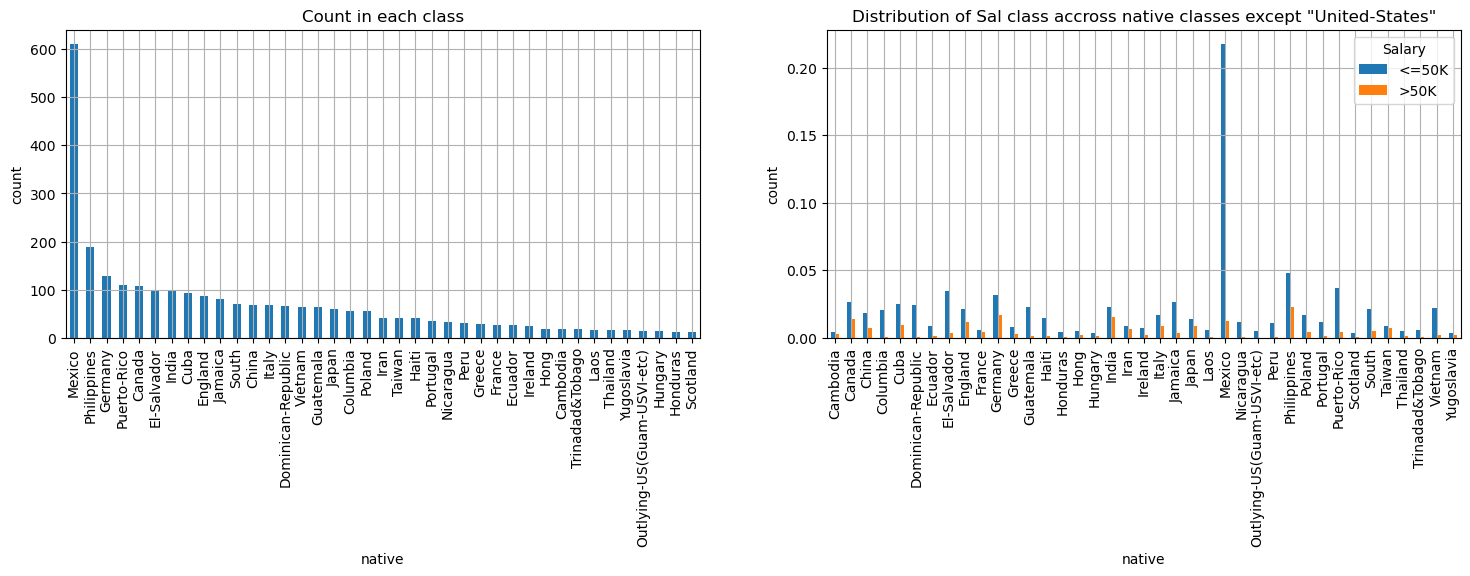

In [19]:
fig,ax = plt.subplots(1,2,figsize=(18,4))
rawData[rawData.native != 'United-States']['native'].value_counts().plot(ax=ax[0],kind='bar',grid=True,
                                                                          title='Count in each class',
                                                                          xlabel='native',ylabel='count')
pd.crosstab(rawData[rawData.native != 'United-States']['native'], 
            rawData.Salary,normalize=True).plot(ax=ax[1],kind='bar',
                                            grid=True, ylabel='count',
                                            title='Distribution of Sal class accross native classes except "United-States"')
plt.show()

# Understanding   X / ind-variables    ---VS---    y / Dep-variable

Numerical features
-----

age (numerical)      -- age of a person  - Age is not that useful feature as we have no of years of education 'educationno'

educationno (numerical)     -- No of years in education  -  good feature which shows a strong relationship with salary 

capitalgain   --  profit received from the sale of an investment  -  Sparse column but shows a good predictor as per PPSCORE.

capitalloss      -- A decrease in the value of a capital asset  -  not so good as capital gain.

hoursperweek  -- number of hours work per week    --- not an useful column however there is a strong relation with salary.


In [20]:
# rawData.corr()

In [21]:
%matplotlib inline
# sns.pairplot(rawData,hue='Salary')

Age Vs Salary
----

Age slightly right skewed in the data set.
Age is no distinguisher of classes in salary. Person in the middle aged gorup are the working class and it is imparative that the salary greater than 50K will also be in that age bracket.

As we can see from the picture below the class of greater than 50K is lying in the center. which clearly not distinguishable.

However what we can note with the violin plot is that Age can be devided into three groups, i.e. less than 30 - your salary for sure will be less than 50K and between 30years to 60years, your chance of drawing salary greater than 50K increases, lastly above 60 where you chances of higher salaries is same as less than 50K.

Age feature must be compared with occupation, workclass, relationship and marital status.

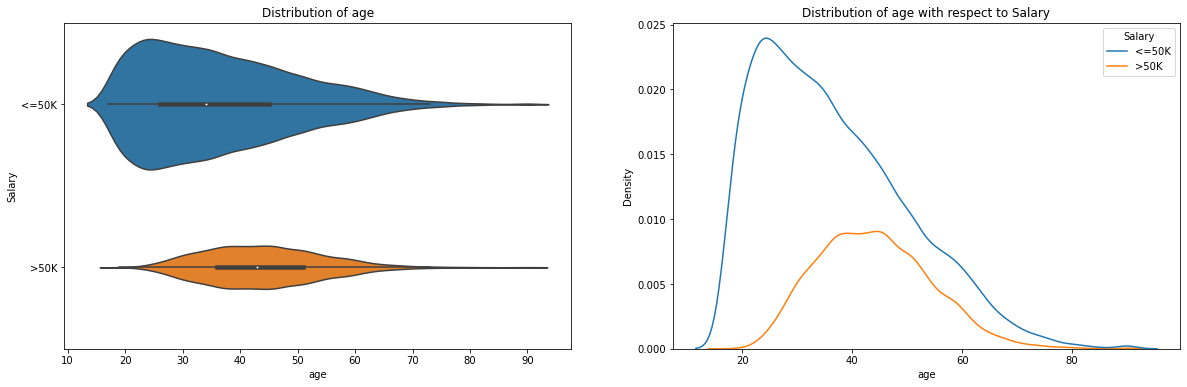

In [22]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
# rawData.age.plot.hist(ax=ax[0],by='native',bins=35,title='Distribution of Age')
# rawData.groupby('Salary')['age'].plot(ax=ax[1],title='Age vs Salary',xlabel='Index',ylabel='Age')
# sns.kdeplot(x=rawData.age,ax=ax[0])
sns.violinplot(x=rawData.age,y=rawData.Salary,ax=ax[0],scale='count')
sns.kdeplot(x=rawData.age,hue=rawData.Salary,ax=ax[1])
ax[0].set_title('Distribution of age')
ax[1].set_title('Distribution of age with respect to Salary')
plt.show()

educationno Vs Salary
----

Educationno is a better distinguisher of Salary classes as we can note that as the number of years of education increases your chance of earning salary more than 50K increases.

the below violinplot clearly shows that there are two phases where we have high salaries. One class is that of highschool dropouts, who happen to start their own enterprises and the other class who compete their undergraduation and go on to complete graduation. The second category must be doing mangagerial or highly skilled job hence the salaries are better. we need to compare the education no feature with workclass and occupation.

This is good feature

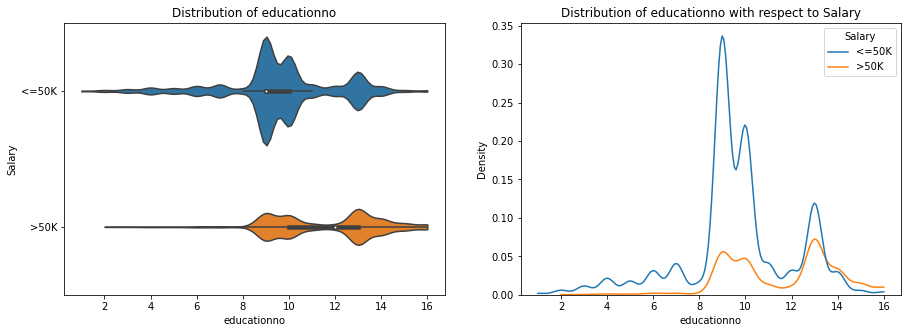

In [23]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
# rawData.educationno.plot.hist(ax=ax[0],bins=5,title='Distribution - no of years education')
# rawData.groupby('Salary')['educationno'].plot(ax=ax[1],title='no of years education vs Salary',xlabel='Index',ylabel='Age')
sns.violinplot(x=rawData.educationno,y=rawData.Salary,ax=ax[0],scale='count',cut=0)
sns.kdeplot(x=rawData.educationno,hue=rawData.Salary,ax=ax[1],cut=0)
ax[0].set_title('Distribution of educationno')
ax[1].set_title('Distribution of educationno with respect to Salary')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

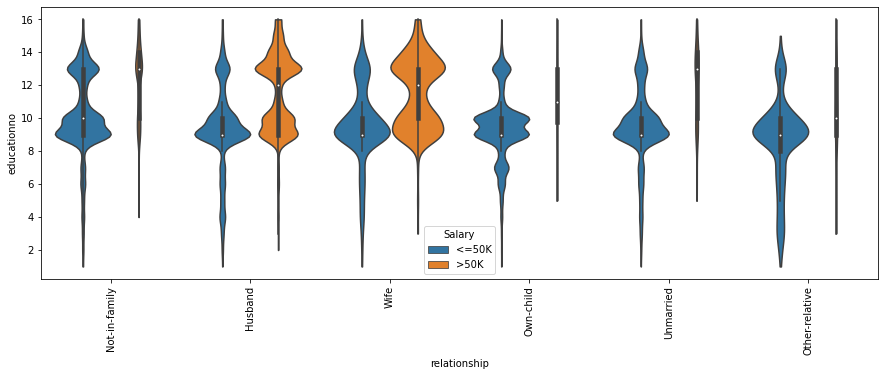

In [24]:
plt.figure(figsize=(15,5))
sns.violinplot(x=rawData.relationship,y=rawData.educationno,hue=rawData.Salary,scale='count',gridsize=100,cut=0)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

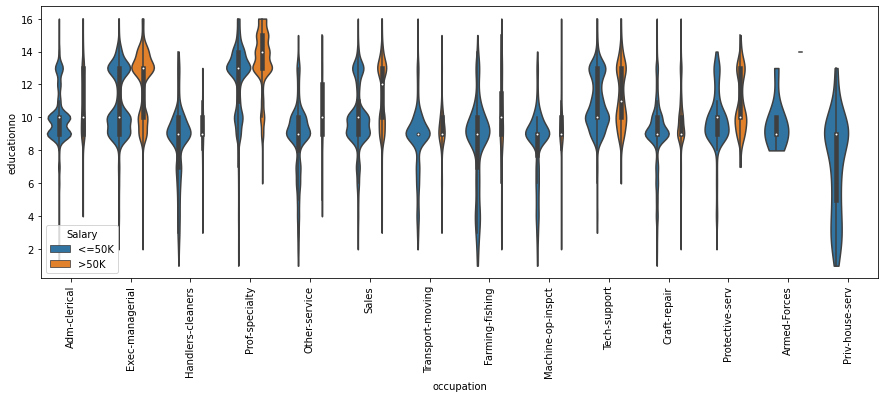

In [25]:
plt.figure(figsize=(15,5))
sns.violinplot(x=rawData.occupation,y=rawData.educationno,hue=rawData.Salary,scale='count',split=False,cut=0)
plt.xticks(rotation=90)
plt.show

capitalgain vs Salary
---

Capital gain has large number of 0 values, which might mean that the person has no capital gain or it might mean that there is no data available. only chance for someone to have capital gain or loss equal to zero is when he has no investment or he does not report his investment. hence the chances that the informatino is not available is very high. hence we can ignore this feature.

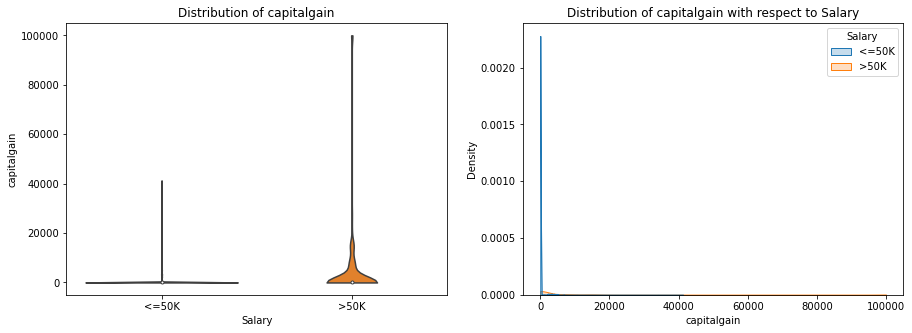

In [26]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
# rawData.capitalgain.plot.hist(ax=ax[0],bins=20,title='Distribution - capitalgain')
# rawData.groupby('Salary')['capitalgain'].plot(ax=ax[1],title='capitalgain vs Salary',xlabel='Index',ylabel='capitalgain')
sns.violinplot(y=rawData.capitalgain,x=rawData.Salary,ax=ax[0],scale='count',ylim=(0,0.00001),cut=0)
sns.kdeplot(x=rawData.capitalgain,hue=rawData.Salary,ax=ax[1],fill=True,cut=0)
ax[0].set_title('Distribution of capitalgain')
ax[1].set_title('Distribution of capitalgain with respect to Salary')
# ax[1].set(ylim=(0,.00001))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

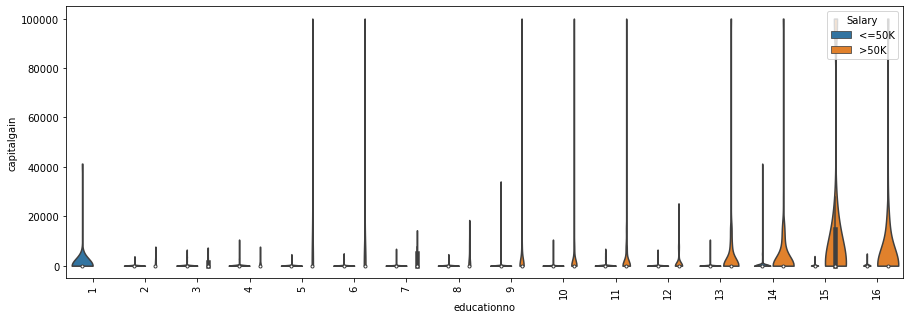

In [27]:
plt.figure(figsize=(15,5))
sns.violinplot(x=rawData.educationno,y=rawData.capitalgain,hue=rawData.Salary,scale='count',gridsize=100,cut=0)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

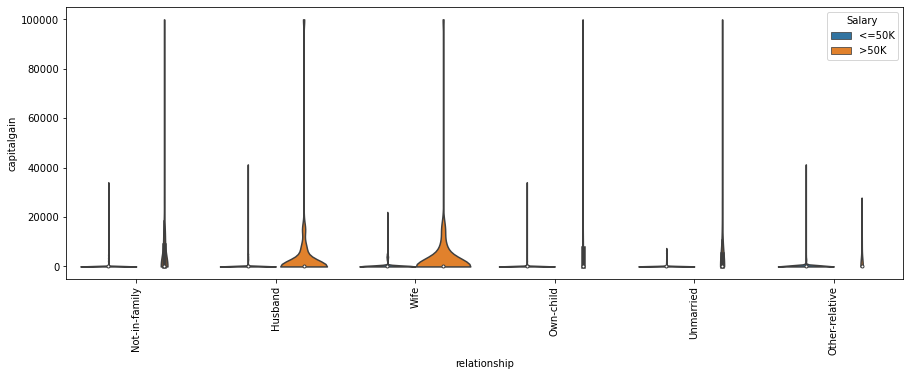

In [28]:
plt.figure(figsize=(15,5))
sns.violinplot(x=rawData.relationship,y=rawData.capitalgain,hue=rawData.Salary,scale='count',gridsize=100,cut=0)
plt.xticks(rotation=90)
plt.show

In [29]:
rawData.groupby('Salary')['capitalgain'].sum()

Salary
<=50K     3373041
>50K     29564100
Name: capitalgain, dtype: int64

In [30]:
rawData[rawData.capitalgain > 0].groupby('Salary')['capitalgain'].count()

Salary
<=50K     943
>50K     1595
Name: capitalgain, dtype: int64

capitalloss Vs Salary
---

Capital loss has large number of 0 values, which might mean that the person has no capital capital or it might mean that there is no data available. only chance for someone to have capital gain or loss equal to zero is when he has no investment or he does not report his investment. hence the chances that the informatino is not available is very high. 

However, when we see this feature along with relationship, educatinono we can see higher education capital loss shows greater chance of salary greater than 50K. possibly my understandin is that those who have investement, which shows in capital gain or loss, belong to the class of higher salary. even though the salary less than 50K category shows investments but its not as prevelent as it is in salary greater than 50K

further investigatino tell that capital gain and capital loss are completely independent of each other. Hence retaining this feature is good. 

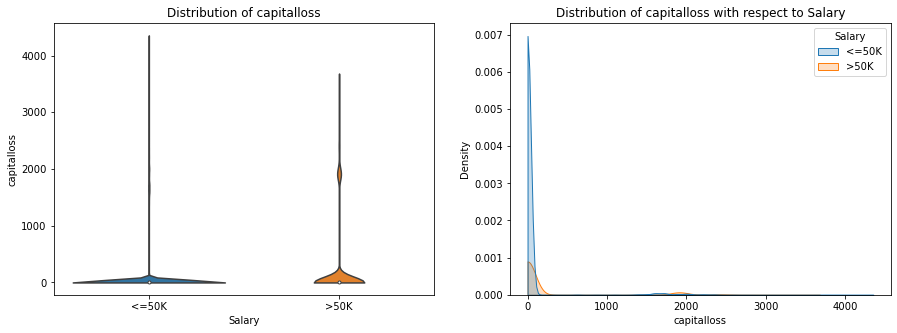

In [31]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
# rawData.capitalloss.plot.hist(ax=ax[0],bins=10,title='Distribution - capitalloss')
# rawData.groupby('Salary')['capitalloss'].plot(ax=ax[1],title='capitalloss vs Salary',xlabel='Index',ylabel='capitalloss')
sns.violinplot(y=rawData.capitalloss,x=rawData.Salary,ax=ax[0],scale='count',ylim=(0,0.00001),cut=0)
sns.kdeplot(x=rawData.capitalloss,hue=rawData.Salary,ax=ax[1],fill=True,cut=0)
ax[0].set_title('Distribution of capitalloss')
ax[1].set_title('Distribution of capitalloss with respect to Salary')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

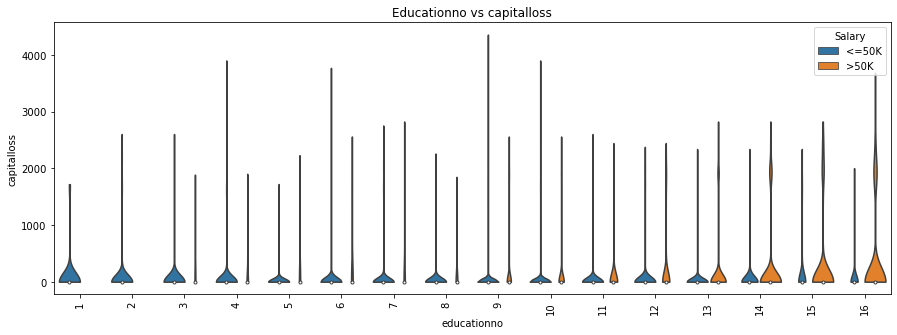

In [32]:
plt.figure(figsize=(15,5))
sns.violinplot(x=rawData.educationno,y=rawData.capitalloss,hue=rawData.Salary,scale='count',gridsize=100,cut=0)
plt.xticks(rotation=90)
plt.title('Educationno vs capitalloss')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

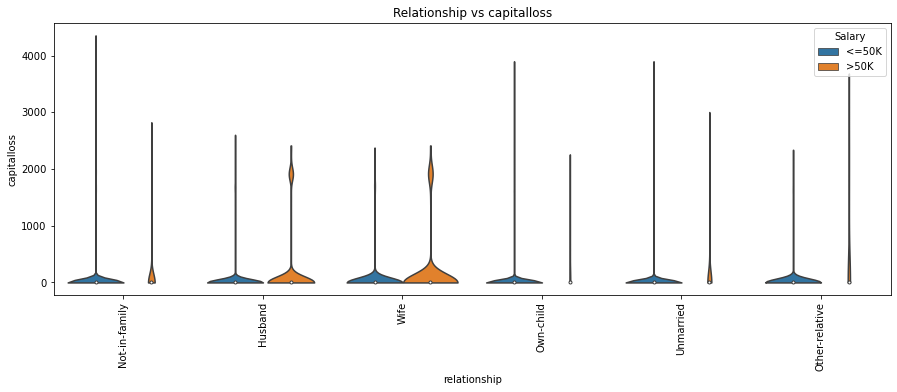

In [33]:
plt.figure(figsize=(15,5))
sns.violinplot(x=rawData.relationship,y=rawData.capitalloss,hue=rawData.Salary,scale='count',gridsize=100,cut=0)
plt.xticks(rotation=90)
plt.title('Relationship vs capitalloss')
plt.show

In [34]:
print(rawData[rawData.capitalloss > 0].groupby('Salary')['capitalloss'].mean())
print(rawData[rawData.capitalloss > 0].groupby('Salary')['capitalloss'].count())

Salary
<=50K    1754.145138
>50K     1973.785617
Name: capitalloss, dtype: float64
Salary
<=50K    689
>50K     737
Name: capitalloss, dtype: int64


In [35]:
rawData[(rawData.capitalgain > 0) & (rawData.capitalloss > 0)].shape

(0, 14)

In [36]:
rawData[(rawData.capitalgain > 0) | (rawData.capitalloss > 0)].shape

(3964, 14)

hoursperweek vs Salary
----

Mejority of the people work 40 hours per week, and possibly the people with salary more than 50K would have average hours per week more than 40 hours.

further down the line if we compare education and hoursperweek in relation with slary we can see that people with higher education and earning salary more than 50k tend to give more no of hours per week.

Also hoursper week and relationship distinguish the slary class, especialy if you are a husband and wife your chances of higher salary increases.

lastly, hoursperweek and occupation clearly show that there are high paid occupations, medium paid occupations and low paid occupations. we can regroup these into the three classes for our analysis. 

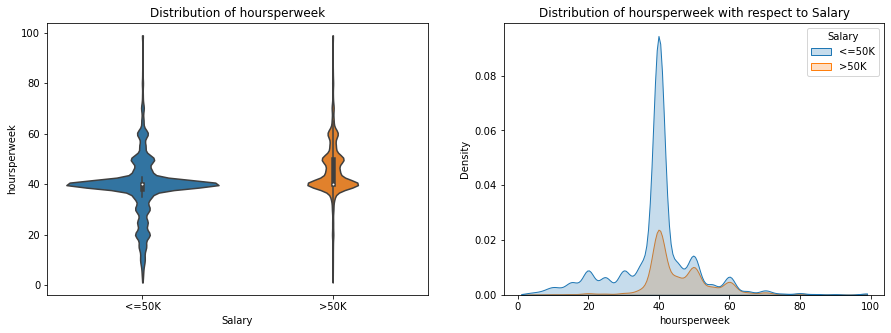

In [37]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
# rawData.hoursperweek.plot.hist(ax=ax[0],bins=10,title='Distribution - hoursperweek')
# rawData.groupby('Salary')['hoursperweek'].plot(ax=ax[1],title='hoursperweek vs Salary',xlabel='Index',ylabel='hoursperweek')
sns.violinplot(y=rawData.hoursperweek,x=rawData.Salary,ax=ax[0],scale='count',ylim=(0,0.00001),cut=0)
sns.kdeplot(x=rawData.hoursperweek,hue=rawData.Salary,ax=ax[1],fill=True,cut=0)
ax[0].set_title('Distribution of hoursperweek')
ax[1].set_title('Distribution of hoursperweek with respect to Salary')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

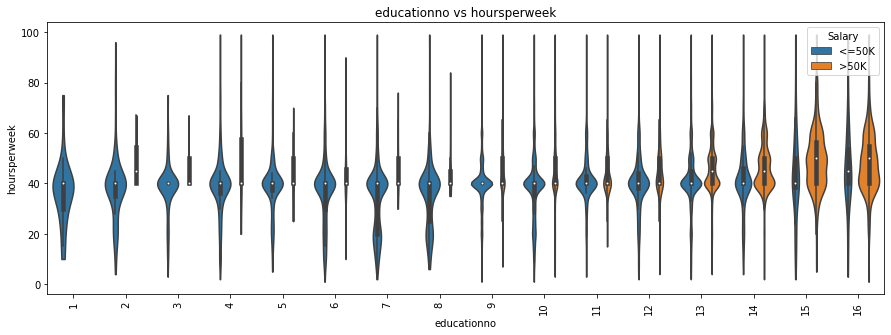

In [38]:
plt.figure(figsize=(15,5))
sns.violinplot(x=rawData.educationno,y=rawData.hoursperweek,hue=rawData.Salary,scale='count',gridsize=100,cut=0)
plt.xticks(rotation=90)
plt.title('educationno vs hoursperweek')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

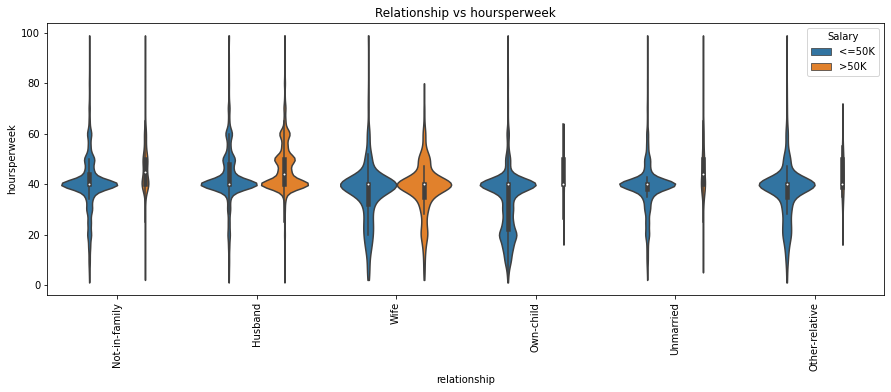

In [39]:
plt.figure(figsize=(15,5))
sns.violinplot(x=rawData.relationship,y=rawData.hoursperweek,hue=rawData.Salary,scale='count',scale_hue=True,cut=0)
plt.xticks(rotation=90)
plt.title('Relationship vs hoursperweek')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

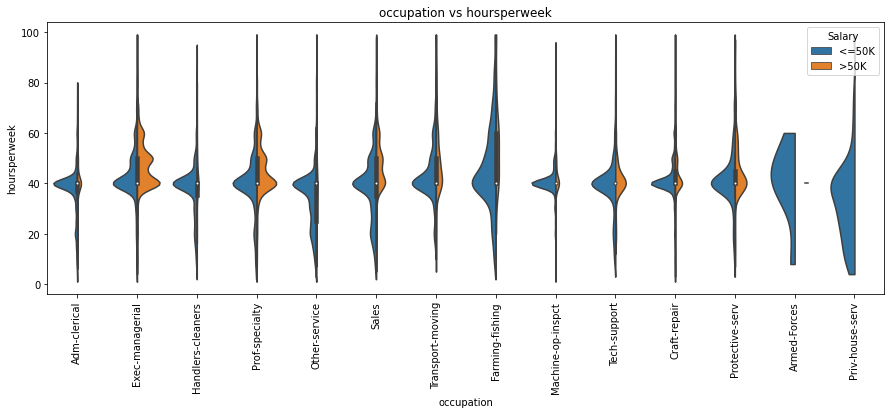

In [40]:
plt.figure(figsize=(15,5))
sns.violinplot(x=rawData.occupation,y=rawData.hoursperweek,hue=rawData.Salary,scale='count',split=True,scale_hue=True,cut=0)
plt.xticks(rotation=90)
plt.title('occupation vs hoursperweek')
plt.show

# DataPreprocessing
================================

In [41]:
encData = rawData.copy(deep=True)

Drop the reatures we don't want to use

    matitalstatus : relationship is a better feature in relation salary than marital status
    Education    : education and educatino no convey the same information. may be we will drop this feature
    Native : native and race are more or less convey the same message hence we drop Native as it has high cardinality

In [42]:
encData.shape

(30161, 14)

In [43]:
encData.drop(['maritalstatus','education','native'],axis=1,inplace=True)

In [44]:
encData.shape

(30161, 11)

### Encoding the Y variable

    '<=50' is coded as 0
    '>50K' is coded as 1

In [45]:
encData['Salary'] = encData.Salary.map({'<=50K' : 0, '>50K' : 1})

In [46]:
encData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           30161 non-null  int64 
 1   workclass     30161 non-null  object
 2   educationno   30161 non-null  int64 
 3   occupation    30161 non-null  object
 4   relationship  30161 non-null  object
 5   race          30161 non-null  object
 6   sex           30161 non-null  object
 7   capitalgain   30161 non-null  int64 
 8   capitalloss   30161 non-null  int64 
 9   hoursperweek  30161 non-null  int64 
 10  Salary        30161 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.5+ MB


Encloding workclass
---
|class|Coded class|
|-----|-----------|
|Private|Private|
|Self-emp-not-inc|Self-emp-not-inc|
|Local-gov|Gov|
|State-gov|Gov|
|Self-emp-inc|Self-emp-inc|
|Federal-gov|Gov|
|Without-pay|Without-pay|

In [47]:
encData['workclass'] = encData.workclass.map({'Private':'Private','Self-emp-not-inc':'Self-emp-int-inc',
                                              'Local-gov':'Gov','State-gov':'Gov','Self-emp-inc':'Self-emp-inc',
                                              'Federal-gov':'Gov','Without-pay':'Without-pay'})
encData.head(2)

,age,workclass,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,Gov,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-int-inc,13,Exec-managerial,Husband,White,Male,0,0,13,0


Encoding Occupation
---
|class|class encoded|
|-----|-------------|
|'Adm-clerical'|Mediumpay|
|'Exec-managerial'|Highpay|
|'Handlers-cleaners'|Lowpay|
|'Prof-specialty'|Highpay|
|'Other-service'|Lowpay|
|'Sales'|Mediumpay|
|'Transport-moving'|Mediumpay|
|'Farming-fishing'|Lowpay|
|'Machine-op-inspct'|Mediumpay|
|'Tech-support'|Mediumpay|
|'Craft-repair'|Mediumpay|
|'Protective-serv'|Mediumpay|
|'Armed-Forces'|Lowpay|
|'Priv-house-serv'|Lowpay|

In [48]:
encData['occupation'] = encData.occupation.map({'Adm-clerical':'Mediumpay', 'Exec-managerial':'Highpay', 'Handlers-cleaners':'Lowpay',
       'Prof-specialty':'Highpay', 'Other-service':'Lowpay', 'Sales':'Mediumpay', 'Transport-moving':'Mediumpay',
       'Farming-fishing':'Lowpay', 'Machine-op-inspct':'Mediumpay', 'Tech-support':'Mediumpay',
       'Craft-repair':'Mediumpay', 'Protective-serv':'Mediumpay', 'Armed-Forces':'Lowpay',
       'Priv-house-serv':'Lowpay'})
encData.head(2)

,age,workclass,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,Gov,13,Mediumpay,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-int-inc,13,Highpay,Husband,White,Male,0,0,13,0


Encoding Relationship
---
|class|Class Encoded|
|-----|-------------|
|'Not-in-family'|Other|
|'Husband'|Husband|
|'Wife'|Wife|
|'Own-child'|Other|
|'Unmarried'|Other|
|'Other-relative'|Other|

In [49]:
encData['relationship'] = encData.relationship.map({'Not-in-family':'Other', 'Husband':'Husband', 'Wife':'Wife', 
                             'Own-child':'Other', 'Unmarried':'Other','Other-relative':'Other'})
encData.head(2)

,age,workclass,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,Gov,13,Mediumpay,Other,White,Male,2174,0,40,0
1,50,Self-emp-int-inc,13,Highpay,Husband,White,Male,0,0,13,0


Encoding Sex
-----------

    Male = 1
    Felmale = 0

In [50]:
encData['sex'] = encData.sex.map({'Male':1,'Female':0})
encData.head(2)

,age,workclass,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,Gov,13,Mediumpay,Other,White,1,2174,0,40,0
1,50,Self-emp-int-inc,13,Highpay,Husband,White,1,0,0,13,0


Encoding Capitalgain
---

    capitalgain <= 0 is retained as 0
    capitalgain > 0 is coded as 1 indicating that the record has an occurance of capital gain instead of quanity of capital gain.

In [51]:
encData.loc[encData['capitalgain'] > 0, 'capitalgain'] = 1 

Encoding Capitalloss
---
    capitalloss <= 0 is retained as 0
    capitalloss > 0 is coded as 1 indicating that the record has an occurance of capital loss instead of quanity of capital loss.

In [52]:
encData.loc[encData['capitalloss'] > 0, 'capitalloss'] = 1

In [53]:
encData[(encData.capitalloss > 0) | (encData.capitalgain >0)]

,age,workclass,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,Gov,13,Mediumpay,Other,White,1,1,0,40,0
8,31,Private,14,Highpay,Other,White,0,1,0,50,1
9,42,Private,13,Highpay,Husband,White,1,1,0,40,1
22,43,Private,7,Mediumpay,Husband,White,1,0,1,40,0
30,45,Private,13,Highpay,Other,White,1,0,1,40,0
...,...,...,...,...,...,...,...,...,...,...,...
30121,66,Gov,6,Mediumpay,Husband,White,1,1,0,40,0
30124,57,Gov,9,Mediumpay,Husband,White,1,1,0,40,1
30141,38,Private,13,Highpay,Other,Black,0,1,0,45,1
30148,65,Self-emp-int-inc,15,Highpay,Other,White,1,1,0,60,0


# Applying Label encoder on Dataframe

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
lable = LabelEncoder()

In [56]:
for i in encData.columns:
    if encData[i].dtypes == object:
        encData[i] = lable.fit_transform(encData[i])

In [57]:
encData['Salary'] = encData['Salary'].astype('category') # marking Salary as a Category column

In [58]:
encData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           30161 non-null  int64   
 1   workclass     30161 non-null  int32   
 2   educationno   30161 non-null  int64   
 3   occupation    30161 non-null  int32   
 4   relationship  30161 non-null  int32   
 5   race          30161 non-null  int32   
 6   sex           30161 non-null  int64   
 7   capitalgain   30161 non-null  int64   
 8   capitalloss   30161 non-null  int64   
 9   hoursperweek  30161 non-null  int64   
 10  Salary        30161 non-null  category
dtypes: category(1), int32(4), int64(6)
memory usage: 1.9 MB


In [59]:
encData

,age,workclass,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,0,13,2,1,4,1,1,0,40,0
1,50,3,13,0,0,4,1,0,0,13,0
2,38,1,9,1,1,4,1,0,0,40,0
3,53,1,7,1,0,2,1,0,0,40,0
4,28,1,13,0,2,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
30156,27,1,12,2,2,4,0,0,0,38,0
30157,40,1,9,2,0,4,1,0,0,40,1
30158,58,1,9,2,1,4,0,0,0,40,0
30159,22,1,9,2,1,4,1,0,0,20,0


# Feature selection

We will use `PPSCORE` and `DECISION TREE - FEATURE_IMPORTANCES` to select our Features.

## feature_importance_ using Decision Tree

**feature importance on Full Dataset**

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [61]:
X = encData.drop('Salary',axis=1)
y = encData.Salary

In [62]:
y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: category
Categories (2, int64): [0, 1]

In [63]:
DT = DecisionTreeClassifier()
cross_val_score(DT,X,y,cv=10)

array([0.79615512, 0.79708223, 0.78945623, 0.79111406, 0.80570292,
       0.78415119, 0.79608753, 0.80636605, 0.80736074, 0.7954244 ])

In [64]:
DT.fit(X,y)
DT.feature_importances_

array([0.23106388, 0.06052974, 0.18515663, 0.04176161, 0.2429201 ,
       0.03052331, 0.00829095, 0.04262155, 0.01643108, 0.14070115])

In [65]:
pd.DataFrame(zip(encData.drop('Salary',axis=1).columns, pd.Series(DT.feature_importances_)),
             columns=['feature','score']).sort_values(by='score',ascending=False)

,feature,score
4,relationship,0.242920
0,age,0.231064
2,educationno,0.185157
9,hoursperweek,0.140701
1,workclass,0.060530
7,capitalgain,0.042622
3,occupation,0.041762
5,race,0.030523
8,capitalloss,0.016431
6,sex,0.008291


Selecting the Features based on decision tree
---

As per the input we are using only 5 columns for prediction

In [66]:
newX = X.drop(['capitalgain','capitalloss','occupation','race','sex'],axis=1)

# Splitting the data into Train and Test

    X = Independent features
    y = Dependent feature

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_val,y_train,y_val = train_test_split(newX,y,test_size = .33, shuffle=True,random_state=42)

In [69]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((20207, 5), (9954, 5), (20207,), (9954,))

# Model Building - Naive Bayes
=======================================

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score,confusion_matrix

In [71]:
ignb = GaussianNB()
ignb.fit(X_train,y_train)

GaussianNB()

In [72]:
pred_gnb = ignb.predict(X_train)

In [73]:
ignb.score(X_train,y_train)

0.8065521848864255

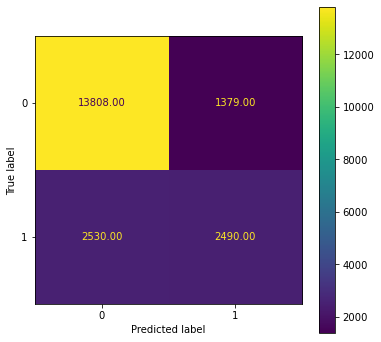

In [74]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(ignb,
    X_train,
    y_train,
    labels=None,
    sample_weight=None,
    normalize=None,
    display_labels=None,
    include_values=True,
    xticks_rotation='horizontal',
    values_format='5.2f',
    cmap='viridis',
    ax=ax,)

# Test on validation dataset

In [75]:
y_pred = ignb.predict(X_val)
acc = accuracy_score(y_val, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 80.78159533855737


In [76]:
confusion_matrix(y_val, y_pred)

array([[6816,  650],
       [1263, 1225]], dtype=int64)

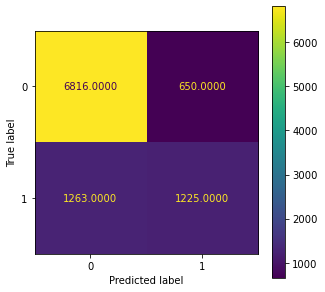

In [77]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
plot_confusion_matrix(ignb,X_val,y_val,values_format = '.4f',ax=ax )

*Conclusion - model building and validation*
----
WE are getting following scores for train and test

    Crossval score - Train accuracy    = 80.65%
    Validation accuracy - unknown data = 80.78%

As our train and test accuracy is same we can say the model is performing consistently.

# Testing on the Test dataset - Gaussian NB
===============================================================


Data processing on Test dataset
-----

In [78]:
Test_Data = pd.read_csv('SalaryData_Test.csv', skipinitialspace=True)
Test_Data[Test_Data.race == 'Black'].head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
17,34,Private,Some-college,10,Never-married,Other-service,Own-child,Black,Female,0,0,35,United-States,<=50K
22,23,Private,HS-grad,9,Separated,Machine-op-inspct,Unmarried,Black,Male,0,0,54,United-States,<=50K
25,46,State-gov,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,7688,0,38,United-States,>50K


In [79]:
Test_Data.drop(['maritalstatus','education','native'],axis=1,inplace=True)

In [80]:
Test_Data.shape

(15060, 11)

### Test Data - Encoding the Y variable

    '<=50' is coded as 0
    '>50K' is coded as 1

In [81]:
Test_Data['Salary'] = Test_Data.Salary.map({'<=50K' : 0, '>50K' : 1})
Test_Data

,age,workclass,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,7,Machine-op-inspct,Own-child,Black,Male,0,0,40,0
1,38,Private,9,Farming-fishing,Husband,White,Male,0,0,50,0
2,28,Local-gov,12,Protective-serv,Husband,White,Male,0,0,40,1
3,44,Private,10,Machine-op-inspct,Husband,Black,Male,7688,0,40,1
4,34,Private,6,Other-service,Not-in-family,White,Male,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,13,Prof-specialty,Own-child,White,Male,0,0,40,0
15056,39,Private,13,Prof-specialty,Not-in-family,White,Female,0,0,36,0
15057,38,Private,13,Prof-specialty,Husband,White,Male,0,0,50,0
15058,44,Private,13,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,0


In [82]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           15060 non-null  int64 
 1   workclass     15060 non-null  object
 2   educationno   15060 non-null  int64 
 3   occupation    15060 non-null  object
 4   relationship  15060 non-null  object
 5   race          15060 non-null  object
 6   sex           15060 non-null  object
 7   capitalgain   15060 non-null  int64 
 8   capitalloss   15060 non-null  int64 
 9   hoursperweek  15060 non-null  int64 
 10  Salary        15060 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.3+ MB


Test Data - Encloding workclass
---
|class|Coded class|
|-----|-----------|
|Private|Private|
|Self-emp-not-inc|Self-emp-not-inc|
|Local-gov|Gov|
|State-gov|Gov|
|Self-emp-inc|Self-emp-inc|
|Federal-gov|Gov|
|Without-pay|Without-pay|

In [83]:
Test_Data['workclass'] = Test_Data.workclass.map({'Private':'Private','Self-emp-not-inc':'Self-emp-int-inc',
                                              'Local-gov':'Gov','State-gov':'Gov','Self-emp-inc':'Self-emp-inc',
                                              'Federal-gov':'Gov','Without-pay':'Without-pay'})
Test_Data.head(2)

,age,workclass,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,7,Machine-op-inspct,Own-child,Black,Male,0,0,40,0
1,38,Private,9,Farming-fishing,Husband,White,Male,0,0,50,0


Test Data - Encoding Occupation
---
|class|class encoded|
|-----|-------------|
|'Adm-clerical'|Mediumpay|
|'Exec-managerial'|Highpay|
|'Handlers-cleaners'|Lowpay|
|'Prof-specialty'|Highpay|
|'Other-service'|Lowpay|
|'Sales'|Mediumpay|
|'Transport-moving'|Mediumpay|
|'Farming-fishing'|Lowpay|
|'Machine-op-inspct'|Mediumpay|
|'Tech-support'|Mediumpay|
|'Craft-repair'|Mediumpay|
|'Protective-serv'|Mediumpay|
|'Armed-Forces'|Lowpay|
|'Priv-house-serv'|Lowpay|

In [84]:
Test_Data['occupation'] = Test_Data.occupation.map({'Adm-clerical':'Mediumpay', 'Exec-managerial':'Highpay', 'Handlers-cleaners':'Lowpay',
       'Prof-specialty':'Highpay', 'Other-service':'Lowpay', 'Sales':'Mediumpay', 'Transport-moving':'Mediumpay',
       'Farming-fishing':'Lowpay', 'Machine-op-inspct':'Mediumpay', 'Tech-support':'Mediumpay',
       'Craft-repair':'Mediumpay', 'Protective-serv':'Mediumpay', 'Armed-Forces':'Lowpay',
       'Priv-house-serv':'Lowpay'})
Test_Data.head(2)

,age,workclass,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,7,Mediumpay,Own-child,Black,Male,0,0,40,0
1,38,Private,9,Lowpay,Husband,White,Male,0,0,50,0


Test Data - Encoding Relationship
---
|class|Class Encoded|
|-----|-------------|
|'Not-in-family'|Other|
|'Husband'|Husband|
|'Wife'|Wife|
|'Own-child'|Other|
|'Unmarried'|Other|
|'Other-relative'|Other|

In [85]:
Test_Data['relationship'] = Test_Data.relationship.map({'Not-in-family':'Other', 'Husband':'Husband', 'Wife':'Wife', 
                             'Own-child':'Other', 'Unmarried':'Other','Other-relative':'Other'})
Test_Data.head(2)

,age,workclass,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,7,Mediumpay,Other,Black,Male,0,0,40,0
1,38,Private,9,Lowpay,Husband,White,Male,0,0,50,0


In [86]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           15060 non-null  int64 
 1   workclass     15060 non-null  object
 2   educationno   15060 non-null  int64 
 3   occupation    15060 non-null  object
 4   relationship  15060 non-null  object
 5   race          15060 non-null  object
 6   sex           15060 non-null  object
 7   capitalgain   15060 non-null  int64 
 8   capitalloss   15060 non-null  int64 
 9   hoursperweek  15060 non-null  int64 
 10  Salary        15060 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.3+ MB


Encoding Capitalgain
---

    capitalgain <= 0 is retained as 0
    capitalgain > 0 is coded as 1 indicating that the record has an occurance of capital gain instead of quanity of capital gain.

In [87]:
Test_Data.loc[Test_Data['capitalgain'] > 0, 'capitalgain'] = 1 

Encoding Capitalloss
---
    capitalloss <= 0 is retained as 0
    capitalloss > 0 is coded as 1 indicating that the record has an occurance of capital loss instead of quanity of capital loss.

In [88]:
Test_Data.loc[Test_Data['capitalloss'] > 0, 'capitalloss'] = 1

In [89]:
Test_Data[(Test_Data.capitalloss > 0) | (Test_Data.capitalgain >0)]

,age,workclass,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
3,44,Private,10,Mediumpay,Husband,Black,Male,1,0,40,1
5,63,Self-emp-int-inc,15,Highpay,Husband,White,Male,1,0,32,1
8,65,Private,9,Mediumpay,Husband,White,Male,1,0,40,1
11,48,Private,9,Mediumpay,Husband,White,Male,1,0,48,1
20,45,Self-emp-int-inc,9,Mediumpay,Husband,White,Male,1,0,90,1
...,...,...,...,...,...,...,...,...,...,...,...
15033,60,Private,11,Highpay,Husband,White,Male,1,0,40,1
15034,39,Private,13,Mediumpay,Other,White,Female,0,1,40,0
15036,43,Gov,14,Highpay,Husband,White,Male,0,1,50,1
15042,40,Private,15,Highpay,Husband,White,Male,1,0,55,1


In [90]:
Test_Data.shape

(15060, 11)

In [91]:
Test_Data.hoursperweek.value_counts()

40    7107
50    1376
45     849
60     680
35     592
      ... 
73       1
76       1
79       1
89       1
69       1
Name: hoursperweek, Length: 89, dtype: int64

# Test Data - Applying Label encoder on Dataframe

In [92]:
encTData = Test_Data.copy(deep=True)
# encTData = pd.get_dummies(Test_Data,drop_first=True)
for i in Test_Data.columns:
    if Test_Data[i].dtypes == object:
        encTData[i] = lable.fit_transform(encTData[i])

In [93]:
encTData['Salary'] = encTData.Salary.astype('category')

In [94]:
encTData.head(3)

,age,workclass,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,1,7,2,1,2,1,0,0,40,0
1,38,1,9,1,0,4,1,0,0,50,0
2,28,0,12,2,0,4,1,0,0,40,1


In [95]:
encTData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           15060 non-null  int64   
 1   workclass     15060 non-null  int32   
 2   educationno   15060 non-null  int64   
 3   occupation    15060 non-null  int32   
 4   relationship  15060 non-null  int32   
 5   race          15060 non-null  int32   
 6   sex           15060 non-null  int32   
 7   capitalgain   15060 non-null  int64   
 8   capitalloss   15060 non-null  int64   
 9   hoursperweek  15060 non-null  int64   
 10  Salary        15060 non-null  category
dtypes: category(1), int32(5), int64(5)
memory usage: 897.4 KB


In [96]:
encTData.Salary.value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

In [97]:
# Test_Data.drop(['capitalgain','capitalloss','sex','race','occupation'],axis=1,inplace=True)

In [98]:
Test_Data.shape

(15060, 11)

# Test Data - Splitting the Data in X,y 

    x = Independent features and 
    y = Dependent feature

In [99]:
y_test = encTData.Salary.values
y_test

[0, 0, 1, 1, 0, ..., 0, 0, 0, 0, 1]
Length: 15060
Categories (2, int64): [0, 1]

In [100]:
X_test = encTData.drop(['Salary','capitalgain','capitalloss','sex','race','occupation'],axis=1)
print(type(X_test))
X_test.head()

<class 'pandas.core.frame.DataFrame'>


,age,workclass,educationno,relationship,hoursperweek
0,25,1,7,1,40
1,38,1,9,0,50
2,28,0,12,0,40
3,44,1,10,0,40
4,34,1,6,1,30


Predicting on test dataset
---

In [101]:
y_pred = ignb.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 80.46480743691899


In [102]:
confusion_matrix(y_test, y_pred)

array([[10291,  1069],
       [ 1873,  1827]], dtype=int64)

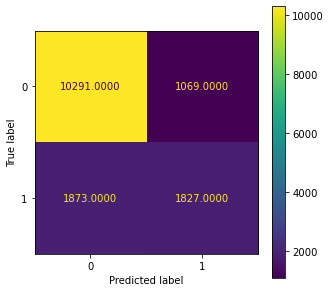

In [103]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
plot_confusion_matrix(ignb,X_test,y_test,values_format = '.4f',ax=ax )

# CONCLUSION - Gaussin Naive Bayes algo

THE MODEL ACCURACY ON VALIDATION AND TEST SETS ARE ALMOST EQUAL. THE VALIDATION ACCURACY STANDS AT 80.78% AND THE TEST ACCUARCY STANDS AT 80.46%, WHICH MEANS THAT THE MODEL IS CONSISTENTLY PERFORMING ON THE UNKNOWN DATASETS. HENCE, WE CAN PRESENT IT THE THE CLIENTS.


# MODEL BUILDING - Categorical Naive Bayes algorithm
=======================================================================================

Categorical NB is an alogorithm from sklearn library which is more suited to the datasets where more or all features are categorical in nature. Hence we shall try this on our data set. the two numerical columns, namely ``'euducationno'`` and ``'hoursperweek'`` are also descrete and can be treated as categorical columns.

In [104]:
from sklearn.naive_bayes import CategoricalNB

In [105]:
clf = CategoricalNB(alpha=.001)

In [106]:
X = encData.drop('Salary',axis=1)
y = encData.Salary

In [107]:
clf.fit(X,y)

CategoricalNB(alpha=0.001)

In [108]:
clf.score(X,y)

0.8292496933125559

In [109]:
confusion_matrix(y,clf.predict(X))

array([[19817,  2836],
       [ 2314,  5194]], dtype=int64)

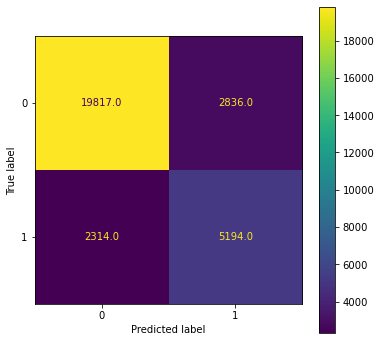

In [110]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(clf,X,y,values_format='5.1f',ax=ax)

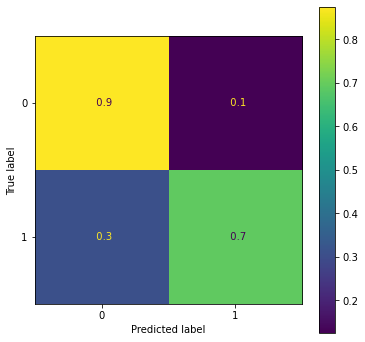

In [111]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(clf,X,y,values_format='5.1f',ax=ax,normalize='true')

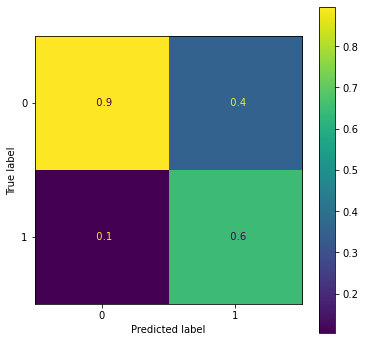

In [112]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(clf,X,y,values_format='5.1f',ax=ax,normalize='pred')

# Applying on the Test Data - Categorical NB
=================================================================

In [113]:
encTData = Test_Data.copy(deep=True)
# encTData = pd.get_dummies(Test_Data,drop_first=True)
for i in Test_Data.columns:
    if Test_Data[i].dtypes == object:
        encTData[i] = lable.fit_transform(encTData[i])

In [114]:
encTData['Salary'] = encTData.Salary.astype('category')

In [115]:
encTData.head(3)

,age,workclass,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,1,7,2,1,2,1,0,0,40,0
1,38,1,9,1,0,4,1,0,0,50,0
2,28,0,12,2,0,4,1,0,0,40,1


In [116]:
Xt = encTData.drop('Salary',axis=1)
Xt.head()

,age,workclass,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,25,1,7,2,1,2,1,0,0,40
1,38,1,9,1,0,4,1,0,0,50
2,28,0,12,2,0,4,1,0,0,40
3,44,1,10,2,0,2,1,1,0,40
4,34,1,6,1,1,4,1,0,0,30


In [117]:
yt = encTData.Salary
yt.head()

0    0
1    0
2    1
3    1
4    0
Name: Salary, dtype: category
Categories (2, int64): [0, 1]

In [118]:
clf.score(Xt,yt)

0.8260956175298805

In [119]:
confusion_matrix(yt,clf.predict(Xt))

array([[9932, 1428],
       [1191, 2509]], dtype=int64)

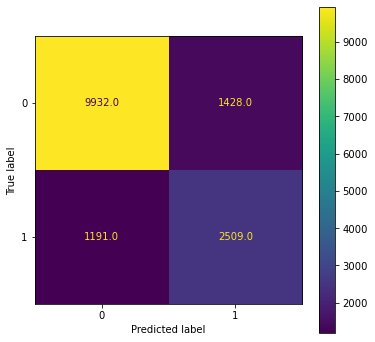

In [120]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(clf,Xt,yt,values_format='5.1f',ax=ax)
plt.show()

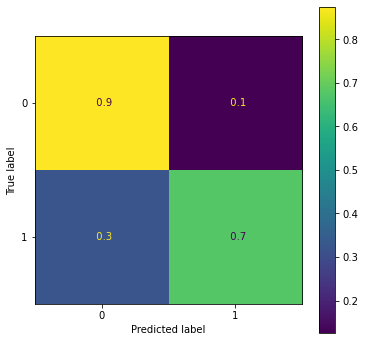

In [121]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(clf,Xt,yt,values_format='5.1f',ax=ax,normalize='true')
plt.show()

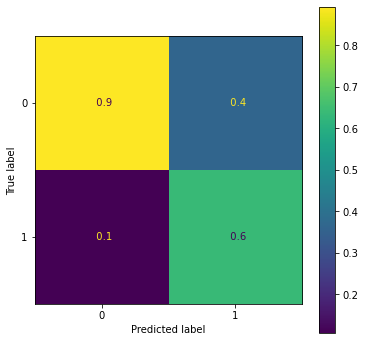

In [122]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(clf,Xt,yt,values_format='5.1f',ax=ax,normalize='pred')
plt.show()

# CONCLUSION - Categorical Naive Bayes algorithm

**We can clearly see that overall Test accuracy has improved from 80.46% (Gaussian Naive Bayes) to 82.60% (CategoricalNB).**

***The Categorical NB is better suited for the dataset where most of the data is categorical in natures. Internally it trains to find relationship for each feature-class in X(predictors) with each class in Y(predicted).***